In [1]:
# Import required libraries
import newspaper
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import numpy as np
import networkx as nx
import re
import string
import torch
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
from nltk.tokenize import sent_tokenize
from newspaper import Article
from pygooglenews import GoogleNews
from newspaper import ArticleException
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from textblob import TextBlob
from transformers import pipeline
from scipy.spatial.distance import cosine

[nltk_data] Downloading package punkt to /Users/Aaliyah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# create an empty array to store articles
news = [] 

In [3]:
# Create an instance of the GoogleNews class
gn = GoogleNews()

In [4]:
# Set the desired search query
search_query = "ASLEF Strike"

In [5]:
# Fetch top 20 news articles
search_results = gn.search(search_query)

In [6]:
# Counter to keep track of the number of articles processed
articles_processed = 0
 
# Iterate through the search results
for entry in search_results['entries']:
    try:
        # Get the URL of the article
        article_url = entry['link']
       
        # Download and parse the article using newspaper3k
        article = Article(article_url)
        article.download()
        article.parse()
       
        # Print the title, link, and body of the article
        print("Title:", article.title)
        print("Link:", article_url)
        print("Body:", article.text)
        print("\n")
               
        news.append([article.title,article_url,article.text])
    
        # Increment the counter
        articles_processed += 1
              
        # Break the loop if we have processed 20 articles
        if articles_processed >= 20:
            break
   
    except ArticleException as e:
        # Handle the exception (e.g., log the error, skip the article)
        #print("Error")
        print(f"Error processing article: {str(e)}")
        continue

Title: Train strikes in May 2024: Full list of dates and lines affected this week
Link: https://news.google.com/rss/articles/CBMiY2h0dHBzOi8vbmV3cy5za3kuY29tL3N0b3J5L3RyYWluLXN0cmlrZXMtaW4tbWF5LTIwMjQtZnVsbC1saXN0LW9mLWRhdGVzLWFuZC1saW5lcy1hZmZlY3RlZC0xMzA5ODYzONIBZ2h0dHBzOi8vbmV3cy5za3kuY29tL3N0b3J5L2FtcC90cmFpbi1zdHJpa2VzLWluLW1heS0yMDI0LWZ1bGwtbGlzdC1vZi1kYXRlcy1hbmQtbGluZXMtYWZmZWN0ZWQtMTMwOTg2Mzg?oc=5
Body: Train drivers will stage a fresh wave of strikes and overtime bans this week, causing disruption to the rail network.

The strikes are part of a long-running dispute over pay.

Members of Aslef union at 16 rail companies will walk out on different days from 7 to 9 May.

Additionally, all members will refuse to work any overtime from 6 May to 11 May.

Here is a full list of the services affected by strikes and when.

Rail strike dates

Tuesday 7 May

Strikes will affect c2c, Greater Anglia, GTR Great Northern Thameslink, Southeastern, Southern, Gatwick Express and South Western 

Title: Train driver strikes cause disruption for passengers
Link: https://news.google.com/rss/articles/CBMiLmh0dHBzOi8vd3d3LmJiYy5jb20vbmV3cy9hcnRpY2xlcy9jNG4xNGtkeXc0em_SATJodHRwczovL3d3dy5iYmMuY29tL25ld3MvYXJ0aWNsZXMvYzRuMTRrZHl3NHpvLmFtcA?oc=5
Body: Rail passengers have been warned not to travel due to strikes by train drivers.

The industrial action by members of the Aslef union means there is limited Southeastern, Southern, Thameslink and Gatwick Express services running on Tuesday.

The union said members have walked out as part of a two-year long dispute over pay and working conditions.

The Department for Transport (DfT) said a pay rise which would take train drivers’ average salaries up to £65,000 – almost twice the UK average salary – had been offered.


Title: London travel news LIVE: Broken down vehicle creates six mile traffic jam on M25
Link: https://news.google.com/rss/articles/CBMiRmh0dHBzOi8vbnoubmV3cy55YWhvby5jb20vbG9uZG9uLXRyYXZlbC1uZXdzLWxpdmUtYXNsZWYtMDU1OTUzOTgyLm

Title: May 2024 train strikes – here's everything you need to know
Link: https://news.google.com/rss/articles/CBMiUmh0dHBzOi8vd3d3LmJpZ2lzc3VlLmNvbS9uZXdzL2VtcGxveW1lbnQvbWF5LTIwMjQtdHJhaW4tc3RyaWtlcy1hc2xlZi1kYXRlcy1saW5lcy_SAQA?oc=5
Body: When are Aslef train drivers going on strike?

The strikes will cause severe disruption on impacted routes. In some places there may be no services at all on strike days, and services that are running will start later and finish much earlier than usual – typically running between 7.30am and 6.30pm. The following companies will be impacted:

Tuesday 7 May: c2c, Greater Anglia, GTR Great Northern Thameslink, Southeastern, Southern, Gatwick Express and South Western Railway.

Wednesday 8 May: Avanti West Coast, London Northwestern Railway, Chiltern Railways, CrossCountry, East Midlands Railway, Great Western Railway and West Midlands Trains.

Thursday 9 May: LNER, Northern Trains and TransPennine Express.

In addition to the above dates, union members 

Title: Success of UK rail drivers struggle means challenging ASLEF’s betrayal with fight for rank-and-file committees
Link: https://news.google.com/rss/articles/CBMiOWh0dHBzOi8vd3d3Lndzd3Mub3JnL2VuL2FydGljbGVzLzIwMjQvMDUvMDYvY3RyYy1tMDYuaHRtbNIBAA?oc=5
Body: 

Thousands of train drivers are set to strike England’s rail companies between Tuesday and Thursday in a pay and conditions dispute now 22 months old.

This is officially the longest rail dispute in British history.

Train drivers picketing Leeds rail station in July 2022

The action called by the ASLEF trade union will hit services used by millions, including some cross-border services to Wales and Scotland, and involves drivers at 16 train companies. Services will be further hit by an overtime ban in place between May 6-11.

But once again ASLEF has ensured that the action will not be a joint offensive, with drivers striking different rail firms on separate days, and only for 24 hours maximum. On day one, nine companies will be 

Title: Rail strike hell continues for passengers after drivers turned down offer of pay rise that would give them £65,000 a year
Link: https://news.google.com/rss/articles/CBMihgFodHRwczovL3d3dy5kYWlseW1haWwuY28udWsvbmV3cy9hcnRpY2xlLTEzMzk1NzY3L1JhaWwtc3RyaWtlLWhlbGwtY29udGludWVzLXBhc3NlbmdlcnMtZHJpdmVycy10dXJuZWQtb2ZmZXItcGF5LXJpc2UtNjUtMDAwLXllYXIuaHRtbNIBigFodHRwczovL3d3dy5kYWlseW1haWwuY28udWsvbmV3cy9hcnRpY2xlLTEzMzk1NzY3L2FtcC9SYWlsLXN0cmlrZS1oZWxsLWNvbnRpbnVlcy1wYXNzZW5nZXJzLWRyaXZlcnMtdHVybmVkLW9mZmVyLXBheS1yaXNlLTY1LTAwMC15ZWFyLmh0bWw?oc=5
Body: Rail strike hell is set to continue for passengers after drivers turned down an offer of a pay rise that would give them £65,000 a year.

Members of Aslef will walk out at services running across England and into Wales and Scotland - crippling services for Avanti West Coast, East Midlands Railway, West Midlands Trains, CrossCountry, London North Western Railway, Chiltern and Great Western Railway.

Services will be slashed for the day, w

Title: ASLEF General Secretary Mick Whelan on train strikes over overtime ban
Link: https://news.google.com/rss/articles/CBMiTGh0dHBzOi8vdWsubmV3cy55YWhvby5jb20vYXNsZWYtZ2VuZXJhbC1zZWNyZXRhcnktbWljay13aGVsYW4tMDcyODIyNzI1Lmh0bWzSAQA?oc=5
Body: Evening Standard

Aslef train strikes have hit the capital’s transport network for a second day in a row.Fewer London operators are affected on Wednesday but the Heathrow Express and London Northwestern Railway are among them.On top of this, several of the London operators which saw walkouts on Tuesday are still struggling with delays.These include Southern, South Western Railway and Thameslink which are expecting late starts or running revised timetables.Meanwhile a “nationwide issue” with Border Force e-gates that caused chaos at airports across the country into the early hours of Wednesday has been resolved, the Home Office has announced.


Title: UK train passengers face fresh wave of disruption as drivers strike
Link: https://news.google.com

In [7]:
# Create Pandas Dataframe containing the array of news articles
df = pd.DataFrame(news)

In [8]:
# Rename dataframe columns
df=df.rename(columns={0: "Title", 1: "URL",2:"Body"})

In [9]:
# View dataframe
df

,Title,URL,Body
0,Train strikes in May 2024: Full list of dates ...,https://news.google.com/rss/articles/CBMiY2h0d...,Train drivers will stage a fresh wave of strik...
1,Rail strikes restart as Aslef train drivers em...,https://news.google.com/rss/articles/CBMieGh0d...,Rail passengers face a week of disruption as t...
2,Train driver strikes cause disruption for pass...,https://news.google.com/rss/articles/CBMiLmh0d...,Rail passengers have been warned not to travel...
3,London travel news LIVE: Broken down vehicle c...,https://news.google.com/rss/articles/CBMiRmh0d...,Drivers are facing six-miles of traffic on the...
4,May 2024 train strikes – here's everything you...,https://news.google.com/rss/articles/CBMiUmh0d...,When are Aslef train drivers going on strike?\...
5,Train companies make fresh bid for talks ahead...,https://news.google.com/rss/articles/CBMiP2h0d...,Try unlimited access Only £1 for 4 weeks\n\nTh...
6,May rail strikes: How is the latest train driv...,https://news.google.com/rss/articles/CBMiYmh0d...,Sign up to Simon Calder’s free travel email fo...
7,Success of UK rail drivers struggle means chal...,https://news.google.com/rss/articles/CBMiOWh0d...,\n\nThousands of train drivers are set to stri...
8,May train strikes: Dates and services affected,https://news.google.com/rss/articles/CBMiZGh0d...,Trains on some of the busiest commuter routes ...
9,Rail strike hell continues for passengers afte...,https://news.google.com/rss/articles/CBMihgFod...,Rail strike hell is set to continue for passen...


## Word Cloud

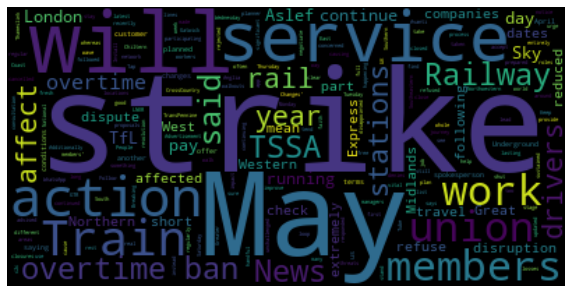

In [10]:
# Create word cloud of first news article
text = df.iloc[0][2]

# Generate word cloud
wc = WordCloud().generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentence Length Distribution

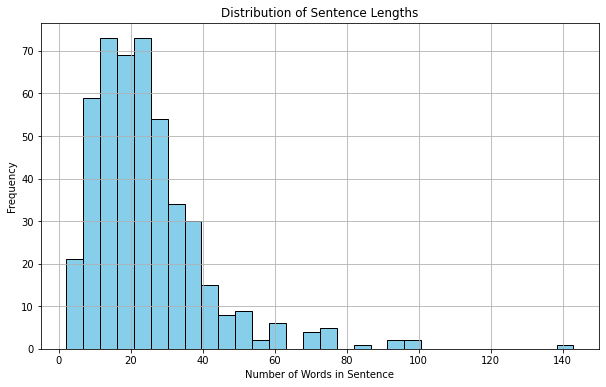

In [11]:
sentence_lengths = df["Body"].apply(lambda x: [len(sent.split()) for sent in sent_tokenize(x)])

# Flatten the list of sentence lengths
all_sentence_lengths = [length for lengths in sentence_lengths for length in lengths]

# Plot the distribution of sentence lengths
plt.figure(figsize=(10, 6))
plt.hist(all_sentence_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Words in Sentence')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Article Length Distribution

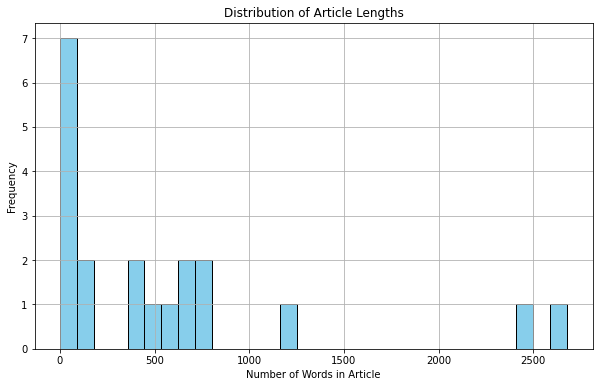

In [12]:
# Tokenize each article into words and calculate article lengths
article_lengths = df["Body"].apply(lambda x: len(x.split()))

# Plot the distribution of article lengths
plt.figure(figsize=(10, 6))
plt.hist(article_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words in Article')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Sentiment Analysis

In [13]:
# Function to calculate sentiment polarity of a text using TextBlob
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to each article in the column df["Body"]
df["Sentiment"] = df["Body"].apply(calculate_sentiment)

# Print the first few rows of the DataFrame with sentiment scores
print(df[["Body", "Sentiment"]].head())

                                                Body  Sentiment
0  Train drivers will stage a fresh wave of strik...   0.142819
1  Rail passengers face a week of disruption as t...   0.085216
2  Rail passengers have been warned not to travel...  -0.063776
3  Drivers are facing six-miles of traffic on the...   0.036239
4  When are Aslef train drivers going on strike?\...   0.117333


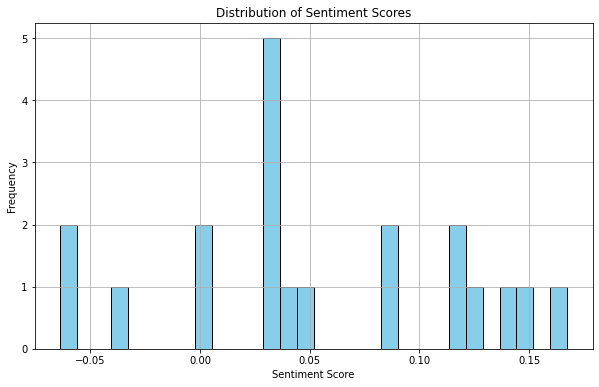

In [14]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df["Sentiment"], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
# Function to calculate sentiment polarity of a text using TextBlob
def calculate_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

# Apply the function to each article in the column df["Body"]
df["Subjectivity"] = df["Body"].apply(calculate_subjectivity)

# Print the first few rows of the DataFrame with sentiment scores
print(df[["Body", "Subjectivity"]].head())

                                                Body  Subjectivity
0  Train drivers will stage a fresh wave of strik...      0.397629
1  Rail passengers face a week of disruption as t...      0.349029
2  Rail passengers have been warned not to travel...      0.259694
3  Drivers are facing six-miles of traffic on the...      0.337803
4  When are Aslef train drivers going on strike?\...      0.425000


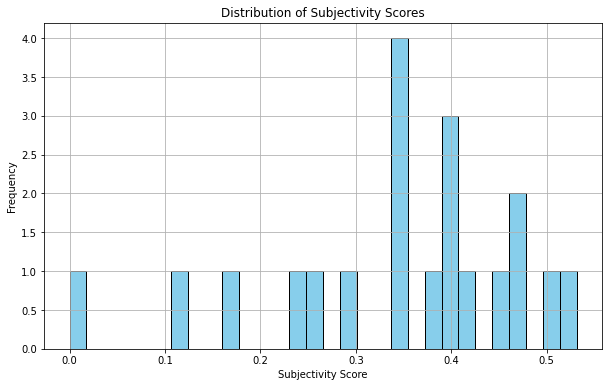

In [16]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df["Subjectivity"], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Extractive Text Summarisation Method

### Lowercasing

In [17]:
# Lowercase all letter in the body of articles
df['Body'] = df['Body'].str.lower()
df

,Title,URL,Body,Sentiment,Subjectivity
0,Train strikes in May 2024: Full list of dates ...,https://news.google.com/rss/articles/CBMiY2h0d...,train drivers will stage a fresh wave of strik...,0.142819,0.397629
1,Rail strikes restart as Aslef train drivers em...,https://news.google.com/rss/articles/CBMieGh0d...,rail passengers face a week of disruption as t...,0.085216,0.349029
2,Train driver strikes cause disruption for pass...,https://news.google.com/rss/articles/CBMiLmh0d...,rail passengers have been warned not to travel...,-0.063776,0.259694
3,London travel news LIVE: Broken down vehicle c...,https://news.google.com/rss/articles/CBMiRmh0d...,drivers are facing six-miles of traffic on the...,0.036239,0.337803
4,May 2024 train strikes – here's everything you...,https://news.google.com/rss/articles/CBMiUmh0d...,when are aslef train drivers going on strike?\...,0.117333,0.425000
5,Train companies make fresh bid for talks ahead...,https://news.google.com/rss/articles/CBMiP2h0d...,try unlimited access only £1 for 4 weeks\n\nth...,0.033333,0.466667
6,May rail strikes: How is the latest train driv...,https://news.google.com/rss/articles/CBMiYmh0d...,sign up to simon calder’s free travel email fo...,0.085524,0.396699
7,Success of UK rail drivers struggle means chal...,https://news.google.com/rss/articles/CBMiOWh0d...,\n\nthousands of train drivers are set to stri...,0.051253,0.343631
8,May train strikes: Dates and services affected,https://news.google.com/rss/articles/CBMiZGh0d...,trains on some of the busiest commuter routes ...,0.120794,0.352090
9,Rail strike hell continues for passengers afte...,https://news.google.com/rss/articles/CBMihgFod...,rail strike hell is set to continue for passen...,0.032631,0.387813


### Sentence Tokenisation

In [18]:
def read_article(text):
    sentences = sent_tokenize(text)
    for i, sentence in enumerate(sentences):
        sentences[i] = re.sub(r'[^a-zA-Z0-9]', ' ', sentence)
    return sentences

In [19]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]

    all_words = list(set(sent1 + sent2))

    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
    
    # Build the vector for the first sentence
    for w in sent1:
        if w not in stopwords:
            vector1[all_words.index(w)] += 1
    # Build the vector for the second sentence
    for w in sent2:
        if w not in stopwords:
            vector2[all_words.index(w)] += 1
            
    return 1 - cosine(vector1, vector2)

In [20]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))

    # Iterate over each pair of sentences
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 != idx2:
                similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)
                
    return similarity_matrix

In [21]:
def generate_summary(text, top_n):
    nltk.download('stopwords')    
    nltk.download('punkt')
    stop_words = stopwords.words('english')    
    summarize_text = []
    # Step 1: Tokenize the text into sentences
    sentences = read_article(text)
    # Step 2: Generate the similarity matrix
    sentence_similarity_matrix = build_similarity_matrix(sentences, stop_words)
    # Step 3: Rank sentences in the similarity matrix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph)
    # Step 4: Sort the ranks and select top sentences
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    # Step 5: Get the top n sentences based on rank
    for i in range(top_n):
        summarize_text.append(ranked_sentences[i][1])
    # Step 6: Output the summarized version
    return " ".join(summarize_text), len(sentences)

In [22]:
# Original Article
print("Original Article: ", df["Body"][0])

Original Article:  train drivers will stage a fresh wave of strikes and overtime bans this week, causing disruption to the rail network.

the strikes are part of a long-running dispute over pay.

members of aslef union at 16 rail companies will walk out on different days from 7 to 9 may.

additionally, all members will refuse to work any overtime from 6 may to 11 may.

here is a full list of the services affected by strikes and when.

rail strike dates

tuesday 7 may

strikes will affect c2c, greater anglia, gtr great northern thameslink, southeastern, southern, gatwick express and south western railway.

wednesday 8 may

advertisement

strikes will affect avanti west coast, london northwestern railway, chiltern railways, crosscountry, east midlands railway, great western railway and west midlands trains.

thursday 9 may

strikes will affect lner, northern trains and transpennine express.

overtime ban dates

from monday 6 may to saturday 11 may union members will not work overtime.

o

In [23]:
# Produce Extractive summary of article
extractive=generate_summary(df["Body"][0],3)
print("Extractive summary: ", extractive)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Aaliyah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Aaliyah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Extractive summary:  ('aslef said train drivers have not had an increase in salary for five years  since their last pay deals expired in 2019   the union said after its members voted overwhelmingly in february to continue taking industrial action  it asked the train operating companies to hold talks   we have made it clear that our union will not accept the continued threats to our members  roles  locations  terms  and conditions to stand unchallenged   a tssa spokesperson said  general secretary mick whelan said the year old pay offer of 4  and another 4  was  dead in the water  ', 29)


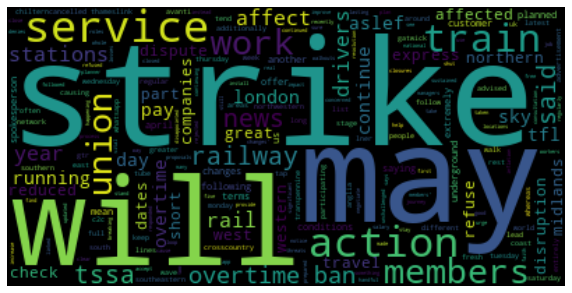

In [24]:
text = df["Body"][0]

# Generate Word Cloud of Original Text
wc = WordCloud().generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

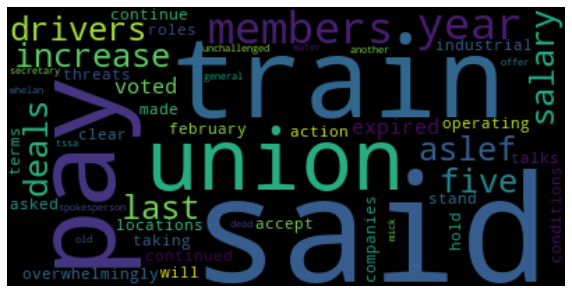

In [25]:
# Generate Extractive Word Cloud
wc = WordCloud().generate(extractive[0])

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Length of orginal article
len(df["Body"][0])

3715

In [27]:
# Length of summarised version through extractive method
len(extractive[0])

564

## Abstractive Text Summarisation Model (BART)

In [28]:
# Redefine dataframe
df = pd.DataFrame(news)

In [29]:
# Define column titles again
df=df.rename(columns={0: "Title", 1: "URL",2:"Body"})

In [31]:
# Filter out articles that are too long or too short for the model to work
df["NBody"]=df["Body"].str.split()
df["WordsCount"]=df["NBody"].apply(lambda x: len(x)) 
df=df[(df["WordsCount"]>= 130)& (df["WordsCount"]<= 1024)]

In [32]:
# Define a function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the 'text' column
df['Body'] = df['Body'].apply(remove_punctuation)

In [33]:
df.reset_index(drop=True,inplace=True)

In [34]:
# Load the summarization pipeline with the BART model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Initialize an empty list to store the final summaries
all_summaries = []

# Iterate over each string in the "Body" column of the DataFrame
for idx, input_text in enumerate(df["Body"]):
    # Generate the summary for the current input text
    summary = summarizer(input_text, max_length=130, min_length=30, do_sample=False)
    # Append the summary text to the list of final summaries
    all_summaries.append(summary[0]['summary_text'])

    # Print the news article title and summary
    print(f"\033[1mSummary for news article {idx + 1}: {df['Title'][idx]}\033[0m\n{summary[0]['summary_text']}\n")

Some weights of BartForConditionalGeneration were not initialized from the model checkpoint at facebook/bart-large-cnn and are newly initialized: ['model.shared.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Summary for news article 1: Train strikes in May 2024: Full list of dates and lines affected this week
Train drivers will stage a fresh wave of strikes and overtime bans this week causing disruption to the rail network. The strikes are part of a longrunning dispute over pay with Aslef union at 16 rail companies. All members will refuse to work any overtime from 6 May to 11 May.

Summary for news article 2: Rail strikes restart as Aslef train drivers embark on new action
Rail passengers face a week of disruption as train drivers embark on another round of industrial action on Monday despite tentative attempts by the industry to restart talks.Drivers in the Aslef union will strike for 24 hours at each of England’s national train operators over the course of three days from Tuesday until Thursday. An overtime ban will apply nationwide from Monday until Saturday affecting some crossborder services to Wales and Scotland.

Summary for news article 3: May 2024 train strikes – here's everythin

In [35]:
# Length of first summarised article
len(all_summaries[0])

277

## WordCloud

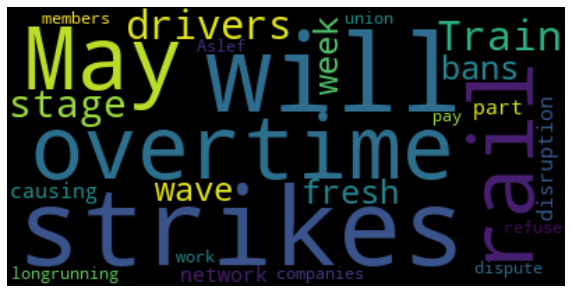

In [36]:
# Generate word cloud of abstractive summarised model
wc = WordCloud().generate(all_summaries[0])

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()